# Insurance Claims Case Study

In [1]:
import pandas as pd
import numpy as np

In [2]:
claims_data=pd.read_csv("D:/Analytixlabs Data/Module 5 - Python Foundation/Case Studies/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv")

In [3]:
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust_data=pd.read_csv("D:/Analytixlabs Data/Module 5 - Python Foundation/Case Studies/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [5]:
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [6]:
cust_data.shape

(1085, 6)

In [7]:
claims_data.shape

(1100, 10)

In [8]:
cust_claim_data=pd.merge(left=claims_data,right=cust_data,how="left",left_on='customer_id',right_on='CUST_ID')

In [9]:
cust_claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


In [10]:
cust_claim_data.shape

(1100, 16)

## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [11]:
cust_claim_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [12]:
cust_claim_data['claim_date']=pd.to_datetime(cust_claim_data['claim_date'])

In [13]:
cust_claim_data['DateOfBirth']=pd.to_datetime(cust_claim_data['DateOfBirth'])

In [14]:
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [15]:
cust_claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold


## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [16]:
cust_claim_data['claim_amount']=cust_claim_data.claim_amount.str.lstrip('$')

In [17]:
cust_claim_data['claim_amount']=pd.to_numeric(cust_claim_data['claim_amount'])

In [18]:
cust_claim_data.claim_amount

0        2980.0
1        2980.0
2        3369.5
3        1680.0
4        2680.0
         ...   
1095     3059.0
1096     1520.0
1097    23575.0
1098    25120.0
1099    36685.0
Name: claim_amount, Length: 1100, dtype: float64

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [19]:
cust_claim_data.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum


In [20]:
cust_claim_data.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [21]:
cust_claim_data[(cust_claim_data['claim_type']=='Injury only') & (cust_claim_data['police_report']=='No')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,63916778.0,Male,2066-09-07,IL,146-157-4572,Platinum
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,17004138.0,Female,2065-08-13,WA,436-354-4682,Silver
29,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,80379865.0,Male,2069-02-27,NM,427-513-8479,Gold
37,13167216,27205554,Driver error,2018-05-14,Auto,No,Injury only,16910.0,1.0,No,27205554.0,Male,1976-04-12,RI,521-912-8139,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,704775,86088574,Driver error,2017-09-20,Auto,No,Injury only,40951.5,1.0,Yes,86088574.0,Female,1972-02-15,OH,317-643-4523,Gold
1032,99300549,91002298,Natural causes,2017-04-05,Auto,No,Injury only,34010.0,1.0,No,91002298.0,Male,1998-04-09,MA,349-124-3976,Gold
1041,11179944,41946743,Other driver error,2018-05-21,Auto,No,Injury only,17870.0,6.0,No,41946743.0,Female,1970-09-26,WA,756-245-4789,Gold
1062,85546357,90217818,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1.0,Yes,90217818.0,Female,1980-05-18,TN,891-651-8671,Gold


In [22]:
cust_claim_data['flag']= np.where((cust_claim_data['claim_type']=='Injury only') & (cust_claim_data['police_report']=='No'),1,0)

In [23]:
cust_claim_data.flag.value_counts()

0    1039
1      61
Name: flag, dtype: int64

## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [24]:
cust_claim_data.duplicated('customer_id').value_counts()

False    1093
True        7
dtype: int64

In [25]:
cust_claim_data.drop_duplicates('customer_id',keep='last',inplace=True)

In [26]:
cust_claim_data.shape

(1093, 17)

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [27]:
cust_claim_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
flag                    0
dtype: int64

In [28]:
cust_claim_data.claim_amount.fillna(cust_claim_data.claim_amount.mean(),inplace=True)

In [29]:
cust_claim_data.total_policy_claims.fillna(cust_claim_data.total_policy_claims.mean(),inplace=True)

In [30]:
#15 customers who had claimed the amount doesnt have corresponding data in customer table that is why they should kept to be nan because it doesnt make any sense if we fill them.

In [31]:
cust_claim_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
flag                    0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60


In [32]:
import datetime

In [33]:
now=datetime.datetime.now()

In [34]:
type(now)

datetime.datetime

In [35]:
now=pd.to_datetime(now)

In [36]:
now

Timestamp('2020-11-26 21:55:30.579115')

In [37]:
cust_claim_data.loc[cust_claim_data.DateOfBirth.dt.year>2020,'DateOfBirth']=cust_claim_data.loc[cust_claim_data.DateOfBirth.dt.year>2020,'DateOfBirth'].apply(lambda x : x-pd.DateOffset(years=100))

In [38]:
cust_claim_data.DateOfBirth.max()

Timestamp('1999-12-27 00:00:00')

In [39]:
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
flag                            int32
dtype: object

In [40]:
cust_claim_data['age']=(now-cust_claim_data.DateOfBirth).apply(lambda x :(x/365.25).days)

In [41]:
cust_claim_data.age

0       41.0
1       50.0
6       21.0
7       21.0
8       27.0
        ... 
1095     NaN
1096     NaN
1097     NaN
1098     NaN
1099     NaN
Name: age, Length: 1093, dtype: float64

In [42]:
cust_claim_data['age_grp']=np.where(cust_claim_data['age']<=18,'Children',np.where(cust_claim_data['age']<=30,'youth',np.where(cust_claim_data['age']<=60,'adult','senior')))

In [43]:
cust_claim_data['age_grp'].value_counts()

adult     797
youth     281
senior     15
Name: age_grp, dtype: int64

In [44]:
print(797+281+15)
cust_claim_data.shape

1093


(1093, 19)

## 8. What is the average amount claimed by the customers from various segments?

In [45]:
cust_claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,50.0,adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,21.0,youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,youth


In [46]:
cust_claim_data.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12844.831140
Platinum    12370.555376
Silver      12265.024420
Name: claim_amount, dtype: float64

## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [47]:
round(cust_claim_data.loc[cust_claim_data.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum(),2)

incident_cause
Crime                  726958.33
Driver error          3344543.19
Natural causes        1315058.89
Other causes          3778019.05
Other driver error    3342799.96
Name: claim_amount, dtype: float64

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [48]:
cust_claim_data.loc[(cust_claim_data.incident_cause.str.lower().str.contains("driver") & ((cust_claim_data.State == "TX") | (cust_claim_data.State == "DE") | (cust_claim_data.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [49]:
gender_segment=cust_claim_data.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()

In [50]:
gender_segment

,gender,Segment,claim_amount
0,Female,Gold,2.109806e+06
1,Female,Platinum,2.369537e+06
2,Female,Silver,1.896961e+06
3,Male,Gold,2.655626e+06
4,Male,Platinum,2.096234e+06
5,Male,Silver,2.346737e+06


In [51]:
gender_segment_pivot=round(gender_segment.pivot_table(index='Segment',columns='gender',values='claim_amount'),2)

In [52]:
gender_segment_pivot

gender,Female,Male
Segment,,
Gold,2109806.39,2655625.96
Platinum,2369536.86,2096233.63
Silver,1896960.96,2346737.49


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021891F0DE50>,
      dtype=object)

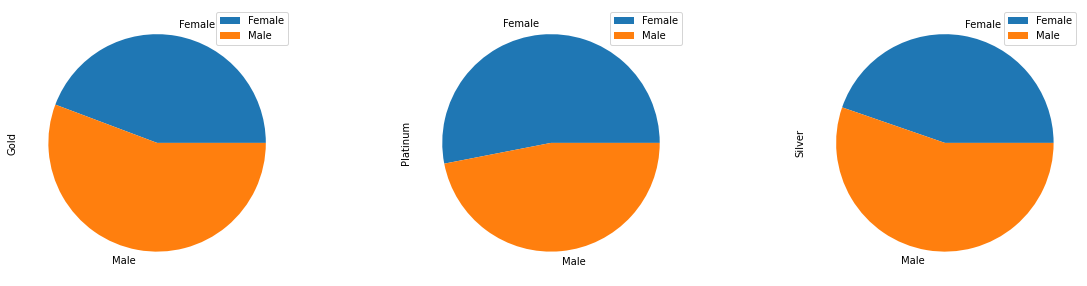

In [53]:
gender_segment_pivot.T.plot(kind='pie',subplots=True,figsize=(20,5))

In [54]:
gender_segment_pivot.T

Segment,Gold,Platinum,Silver
gender,,,
Female,2109806.39,2369536.86,1896960.96
Male,2655625.96,2096233.63,2346737.49


## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [55]:
gender_agg=cust_claim_data.loc[(cust_claim_data.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_")

In [56]:
gender_agg

,CountOf_gender
gender,
Female,221
Male,281


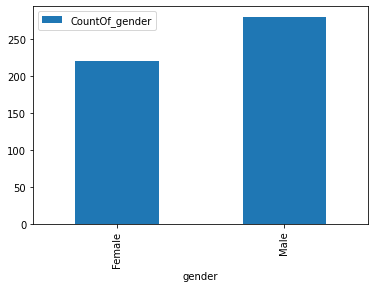

In [57]:
gender_agg.plot(kind='bar')

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [58]:
cust_claim_data.fraudulent.value_counts()

No     841
Yes    252
Name: fraudulent, dtype: int64

In [59]:
gender_fraud=cust_claim_data[cust_claim_data.fraudulent=='Yes'].groupby("age_grp")[["fraudulent"]].count()
gender_fraud

,fraudulent
age_grp,
adult,184
senior,7
youth,61


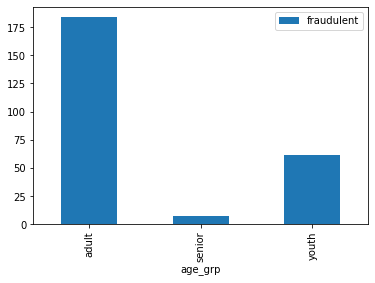

In [60]:
gender_fraud.plot(kind='bar')

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [61]:
cust_claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,50.0,adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,21.0,youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,youth


In [62]:
pd.Timestamp.strftime(cust_claim_data.claim_date[0],format='%B')

'November'

In [63]:
cust_claim_data['month']=cust_claim_data['claim_date'].apply(lambda x : pd.Timestamp.strftime(x,format='%B'))

In [64]:
cust_claim_data.month

0       November
1        October
6        January
7          April
8       February
          ...   
1095        June
1096       March
1097    February
1098       March
1099        June
Name: month, Length: 1093, dtype: object

In [65]:
month_amount=round(cust_claim_data.groupby('month')['claim_amount'].sum(),2)
month_amount

month
April        1293901.03
August        913506.30
December      723236.27
February     1188011.56
January      1326985.36
July         1382767.89
June         1318741.10
March        1348467.83
May          1115279.63
November      625984.53
October      1415648.63
September     982935.66
Name: claim_amount, dtype: float64

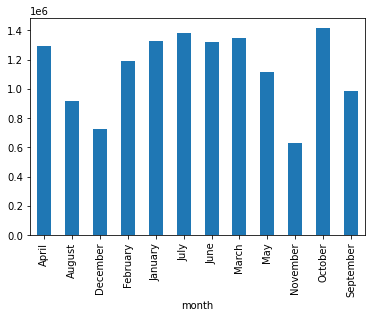

In [66]:
month_amount.plot(kind='bar')

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [67]:
gender_age_agg=cust_claim_data.groupby(['gender','age_grp','fraudulent'])['claim_amount'].mean().reset_index()
gender_age_agg

,gender,age_grp,fraudulent,claim_amount
0,Female,adult,No,12180.562628
1,Female,adult,Yes,11898.212333
2,Female,youth,No,12972.309282
3,Female,youth,Yes,8489.555864
4,Male,adult,No,12414.055444
5,Male,adult,Yes,16254.526785
6,Male,youth,No,12086.301489
7,Male,youth,Yes,11203.652488


In [68]:
gender_age_agg_pivot=gender_age_agg.pivot_table(columns='fraudulent',index=['gender','age_grp'],values='claim_amount')
gender_age_agg_pivot

fraudulent                No           Yes
gender age_grp                            
Female adult    12180.562628  11898.212333
       youth    12972.309282   8489.555864
Male   adult    12414.055444  16254.526785
       youth    12086.301489  11203.652488

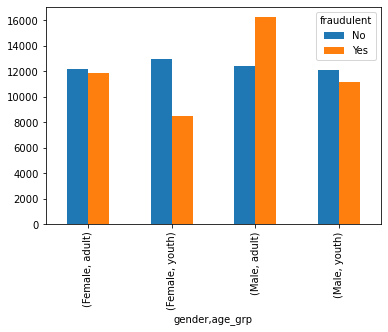

In [69]:
gender_age_agg_pivot.plot(kind='bar')

## 16. Is there any similarity in the amount claimed by males and females?

In [70]:
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp,month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,adult,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,50.0,adult,October
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,21.0,youth,January
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,youth,April
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,youth,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,senior,June
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,senior,March
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,senior,February
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,senior,March


In [76]:
cust_claim_data.gender.value_counts()

Male      551
Female    527
Name: gender, dtype: int64

In [78]:
cust_claim_data['gender encoding']=np.where(cust_claim_data.gender=='Male',1,np.where(cust_claim_data.gender=='Female',2,np.nan))

In [79]:
cust_claim_data['gender encoding'].value_counts()

1.0    551
2.0    527
Name: gender encoding, dtype: int64

In [80]:
sample1=cust_claim_data.claim_amount.loc[cust_claim_data['gender encoding']==1]

In [81]:
sample1

6        1730.0
7        1160.0
8        2620.0
11      16690.0
12       1870.0
         ...   
1077     2290.0
1078     2320.0
1079     2173.5
1082    33080.0
1084     1490.0
Name: claim_amount, Length: 551, dtype: float64

In [82]:
sample2=cust_claim_data.claim_amount.loc[cust_claim_data['gender encoding']==2]

In [83]:
sample2

0        2980.0
1        2980.0
9        2748.5
10       1495.0
14      32560.0
         ...   
1072    38950.0
1076     1380.0
1080     1770.0
1081     2800.0
1083     2840.0
Name: claim_amount, Length: 527, dtype: float64

In [71]:
from scipy import stats

In [87]:
f_result=stats.f_oneway(sample1,sample2)

In [85]:
sample1.mean()

12883.116293686047

In [86]:
sample2.mean()

12099.248985705743

In [91]:
f_result.pvalue

0.3359040397963785

## 17. Is there any relationship between age category and segment?


In [94]:
cust_claim_data.Segment.value_counts()

Gold        371
Platinum    361
Silver      346
Name: Segment, dtype: int64

In [95]:
cust_claim_data.age_grp.value_counts()

adult     797
youth     281
senior     15
Name: age_grp, dtype: int64

In [97]:
age_seg_xtab=pd.crosstab(cust_claim_data.Segment,cust_claim_data.age_grp)

In [98]:
age_seg_xtab

age_grp,adult,youth
Segment,,
Gold,283,88
Platinum,257,104
Silver,257,89


In [104]:
chi2test=stats.chi2_contingency(age_seg_xtab)
chi2test

(2.490226889651911,
 0.2879082445773525,
 2,
 array([[274.29220779,  96.70779221],
        [266.89888683,  94.10111317],
        [255.80890538,  90.19109462]]))

In [108]:
print('p value is',chi2test[1])

p value is 0.2879082445773525


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.


In [109]:
cust_claim_data.claim_amount.mean()

12475.266050583632

In [111]:
ttest=stats.ttest_1samp(cust_claim_data.claim_amount,popmean=10000)

In [119]:
ttest.pvalue

1.234747924704494e-09

## 19. Is there any difference between age groups and insurance claims?

In [120]:
cust_claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp,month,gender encoding
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,adult,November,2.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,1970-01-13,ME,265-543-1264,Silver,0,50.0,adult,October,2.0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,...,Male,1999-03-02,AR,752-398-2914,Gold,0,21.0,youth,January,1.0
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,...,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,youth,April,1.0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,...,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,youth,February,1.0


In [135]:
s1=cust_claim_data.total_policy_claims.loc[cust_claim_data.age_grp=='youth']
s1.mean()

1.6519126060140048

In [136]:
s2=cust_claim_data.total_policy_claims.loc[cust_claim_data.age_grp=='adult']
s2.mean()

1.566812759297041

In [134]:
stats.f_oneway(s1,s2)

F_onewayResult(statistic=1.1505556354115118, pvalue=0.28367337254652286)

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [121]:
cust_claim_data.total_policy_claims

0       1.0
1       3.0
6       4.0
7       3.0
8       1.0
       ... 
1095    4.0
1096    2.0
1097    2.0
1098    1.0
1099    3.0
Name: total_policy_claims, Length: 1093, dtype: float64

In [122]:
cust_claim_data.claim_amount

0        2980.0
1        2980.0
6        1730.0
7        1160.0
8        2620.0
         ...   
1095     3059.0
1096     1520.0
1097    23575.0
1098    25120.0
1099    36685.0
Name: claim_amount, Length: 1093, dtype: float64

In [125]:
amt_policynos=cust_claim_data.corr().loc['total_policy_claims','claim_amount']

In [126]:
print('Total policy claims and Claim amount shows a very low negative correlation that is',amt_policynos)

Total policy claims and Claim amount shows a very low negative correlation that is -0.023900066023189632
